In [1]:
import IPython.html.widgets
import netCDF4
import numpy as np

:0: FutureWarning: IPython widgets are experimental and may change in the future.


/Users/justinbrown/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:8: RuntimeWarning: invalid value encountered in true_divide
/Users/justinbrown/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:9: RuntimeWarning: invalid value encountered in true_divide


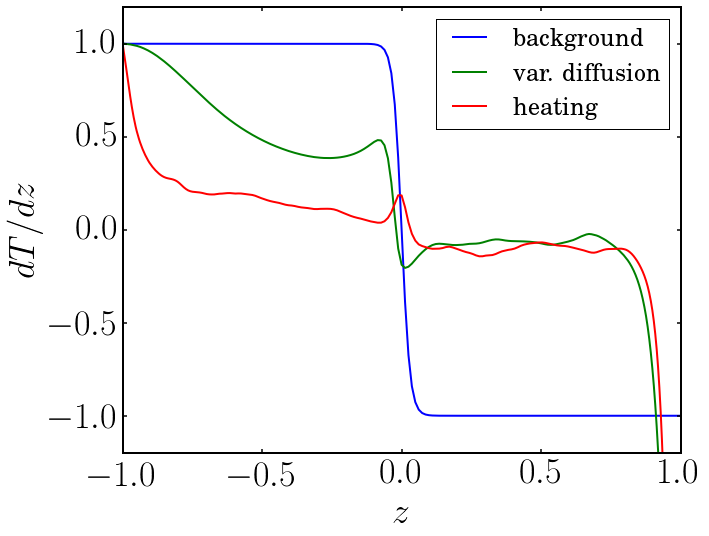

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
dataset = netCDF4.Dataset ('sims/variable/avg_diff.cdf', 'r')
dataset_heat = netCDF4.Dataset ('sims/variable/avg_grad.cdf', 'r')
plt.style.use ("presentation")

plt.plot (dataset ["z"], dataset ["korre_Ts"], label = "background")
plt.plot (dataset ["z"], dataset ["temperature_deriv"] [:] / dataset ["z_deriv"] [:] + dataset ["korre_Ts"] [:], label = "var. diffusion")
plt.plot (dataset ["z"], dataset_heat ["temperature_deriv"] [:] / dataset_heat ["z_deriv"] [:] + dataset_heat ["korre_Ts"] [:], label = "heating")

plt.xlabel ("$z$")
plt.ylabel ("$dT/dz$")

plt.ylim ((-1.2, 1.2))

plt.legend ()

plt.show ()

In [4]:
dataset = netCDF4.Dataset ('sims/variable/output_00.cdf', 'r')

ts = []
for i in range (len (dataset.variables["S"])):
    data = {}
    dkeys = dataset.variables.keys()
    for k in dkeys:
        data[k] = atleast_3d(dataset.variables[k] [i])
    
    # To plot 2D or 1D data, set the size of the unused dims to 1 in dshape
    # Otherwise, treat it like 3D data
        
    bbox = array([[-1.0,1.0],[-1.0,1.0],[0.0,0.0]])
    dshape2d = data['T'].shape
    dshape = (dshape2d[0],dshape2d[1],1) # 2D geometry
    scalemultiplier = 1.0
    ts.append (load_uniform_grid(data,dshape,""))
print (len (ts))
ts = DatasetSeries (ts)

dataset.close ()

RuntimeError: No such file or directory

4



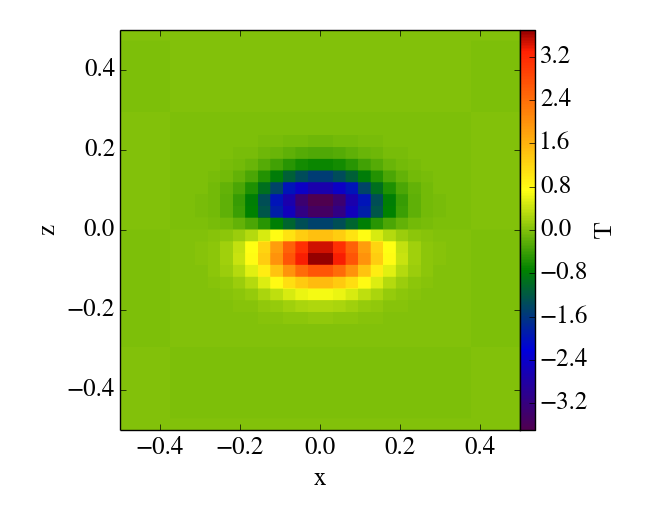

<function __main__.plot_record>

In [9]:
def plot_record (i):
    print (i)
    p=SlicePlot(ts [i],"z","T")
    p.set_figure_size (4)
    p.set_log ("T", False)
    p.set_xlabel ("x")
    p.set_ylabel ("z")
    p.show ()

IPython.html.widgets.interact(plot_record,i=(0,len (ts) - 1,1))

In [7]:
p.save ()

['UniformGridData_Projection_z_T.png']